In [5]:
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)
c = torch.zeros(1000)
start = time()
for i in range(1000):
    c[i] = a[i] + b[i]
end = time()
print(end - start)

0.007978677749633789


In [6]:
start = time()
d = a + b
end = time()
print(end - start)

0.0


tensor([-1.1765,  1.0795], dtype=torch.float64) tensor(-1.8156, dtype=torch.float64)


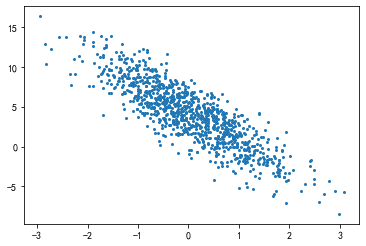

In [44]:
%matplotlib inline
import torch
# import IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random


# 1、生成数据集
num_inputs = 2  # 特征数
num_examples = 1000  # 样本数
true_w = [2, -3.4] # 训练的参数
true_b = 4.2  # 偏置
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs))) # 生成训练数据集（1000个样本，每个样本两个特征）
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b  # 给每个样本一个标签
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))  # 给标签加入噪声

print(features[0], labels[0]) # 第一个样本 和 标签 

# def use_svg_display():
#     # 用矢量图显示􁰁􀢶􀸔􁐏
#     display.set_matplotlib_formats('svg')

# def set_figsize(figsize=(3.5, 2.5)):
#     use_svg_display()
#     # 设置图的尺寸􀢶􁌱􀩮􀩑
#     plt.rcParams['figure.figsize'] = figsize
    
# set_figsize()

plt.scatter(features[:, 1].numpy(), labels.numpy(), 4)

In [45]:
# 2、读取数据
def data_iter(batch_size, features, labels):
    num_examples = len(features) # 样本的个数，也就是数据集的长度
    indices = list(range(num_examples)) # 生成下标
    random.shuffle(indices) # 将下标打乱，也就是将读取的样本打乱
    for i in range(0, num_examples, batch_size): # 每次增加batch_size个数
        j = torch.LongTensor(indices[i: min(i+batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j) # 此函数成为了一个生成器（可迭代）

batch_size = 10 # 批量大小

for x, y in data_iter(batch_size, features, labels):
    print(x, y)
    break
    

tensor([[-0.4163,  0.4358],
        [ 0.2433,  0.3422],
        [-0.4262, -0.0500],
        [-0.4062,  0.1689],
        [ 0.5859, -0.3332],
        [ 1.1944, -1.0145],
        [ 0.0986, -0.3448],
        [-0.9455,  0.0129],
        [-0.1119,  0.3521],
        [-2.2928,  0.4198]], dtype=torch.float64) tensor([ 1.8782,  3.5283,  3.5268,  2.8134,  6.5031, 10.0441,  5.5587,  2.2723,
         2.7586, -1.8171], dtype=torch.float64)


In [46]:
# 3、初始化模型参数
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)))
b = torch.zeros(1)
w.requires_grad_(requires_grad=True) # 设置成可求导
b.requires_grad_(requires_grad=True)
# print(w)

tensor([0.], requires_grad=True)

In [47]:
# 4、定义模型
def linreg(x, w, b):
    return torch.mm(x, w) + b

In [48]:
# 5、定义损失函数
def squared_loss(y_hat, y):
    """
    y_hat：预测值
    y：真实值
    """
    return (y_hat - y.view(y_hat.shape))**2 / 2

In [49]:
# 6、定义优化算法
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [57]:
# 7、模型训练
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y).sum() # 由于loss最终算出来是个向量，所以我们要 求和 使之成为一个 一维向量 才能反向传播求导
        l.backward() # 反向传播
        sgd([w, b], lr, batch_size) # 使用小批量梯度下降法 迭代 模型参数
        
        # 训练参数的 梯度 要清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels) # 将整个训练集 放入，求损失
    print(f"epoch {epoch+1},loss %.10f" % train_l.mean().item())

epoch 1,loss 0.0000491974
epoch 2,loss 0.0000490747
epoch 3,loss 0.0000490639


In [59]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0002],
        [-3.3991]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.1997], requires_grad=True)


# 2、pytorch实现线性回归

In [1]:
import torch
import numpy as np

In [5]:
# 1、生成数据集
num_inputs = 2 # 每个样本的特征数量
num_examples = 1000 # 样本个数
true_w = [2, -3.4] # 真实权重
true_b = 4.2 # 真实的偏差
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float) # 输入数据
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float) # 标签

In [14]:
# 2、读取数据
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# print(dataset)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)
# print(data_iter)

for X, y in data_iter: # 读取并打印第一个小批量数据样本
    print(X, y)
    break

tensor([[ 0.3838, -0.5323],
        [ 0.1359,  0.2488],
        [ 1.8823, -2.3210],
        [-1.2696,  0.1488],
        [-0.1907,  0.0127],
        [ 0.0072, -0.2729],
        [-1.1209, -0.5268],
        [ 0.3589, -0.8970],
        [ 0.4454,  1.1853],
        [ 1.3123,  0.8807]]) tensor([ 6.7698,  3.6341, 15.8563,  1.1690,  3.7854,  5.1431,  3.7350,  7.9863,
         1.0545,  3.8429])


In [33]:
# 3、定义模型
import torch.nn as nn

class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__() # 这句话的作用就是继承父类nn.Module的所有属性和方法
        self.Linear = nn.Linear(n_feature, 1) # 输入了n_feature个特征，输出一个特征
    
    # 定义前向传播，这个就是pytorch实现的魔法方法，即在调用类实例化的对象时，就会自动调用这个方法
    def forward(self, x):
        y = self.Linear(x) # 将数据传入线性模型，然后得出一个结果，再把这个结果返回
        return y

net = LinearNet(num_inputs) # 实例化一个对象
print(net) # 打印出这个网络
y = net(features) # 相当于net.forward(fearures)，其实就是在传入数据实现 神经网络的 前向传播

# net.parameters()来查看参数
for param in net.parameters():
    print(param)
    
# 也可以使用下面的方法来，简单的实现一个线性层（全连接层）
net = nn.Sequential(
            nn.Linear(num_inputs, 1)
            # 此处也可以传入其他层
)

LinearNet(
  (Linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[0.1219, 0.6963]], requires_grad=True)
Parameter containing:
tensor([-0.2382], requires_grad=True)


In [34]:
# 4、初始化模型参数
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0) # 偏差初始化为0
# 下面的形式 也可以把 偏差初始化为0
# net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

In [35]:
# 5、定义损失函数
loss = nn.MSELoss()

In [41]:
# 6、定义优化算法
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)


# 为不同的子网络设置不同的学习率
# optimizer =optim.SGD([
#                 # 如果对某个参数不指定学习率，就是用最外层的默认学习率􀦇􀺎􀩒􀺤􀓻􀝇􀷄􀓧􀳰􀨧􀨍􀔟􁈲􀒅􀩪􀖵􁊠􀹋􀥘􀩶􁌱􁼕􁦊􀨍􀔟􁈲
#                 {'params': net.subnet1.parameters()}, # lr=0.03
#                 {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)
# print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [44]:
# 7、训练模型
num_epochs = 30
for epoch in range(num_epochs):
    for x, y in data_iter:
        output = net(x) # 预测结果
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward() # 反向传播
        optimizer.step() # 更新参数
    print("epoch:%d, loss:%f" % (epoch, l.item()))

epoch:0, loss:0.000110
epoch:1, loss:0.000088
epoch:2, loss:0.000085
epoch:3, loss:0.000088
epoch:4, loss:0.000055
epoch:5, loss:0.000158
epoch:6, loss:0.000089
epoch:7, loss:0.000071
epoch:8, loss:0.000141
epoch:9, loss:0.000179
epoch:10, loss:0.000123
epoch:11, loss:0.000091
epoch:12, loss:0.000161
epoch:13, loss:0.000179
epoch:14, loss:0.000069
epoch:15, loss:0.000090
epoch:16, loss:0.000163
epoch:17, loss:0.000223
epoch:18, loss:0.000117
epoch:19, loss:0.000052
epoch:20, loss:0.000133
epoch:21, loss:0.000181
epoch:22, loss:0.000176
epoch:23, loss:0.000062
epoch:24, loss:0.000129
epoch:25, loss:0.000409
epoch:26, loss:0.000161
epoch:27, loss:0.000144
epoch:28, loss:0.000404
epoch:29, loss:0.000072


In [45]:
dense = net[0]
print(true_w, dense.weight)

[2, -3.4] Parameter containing:
tensor([[ 1.9984, -3.3992]], requires_grad=True)
